In [1]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
import os
from collections import Counter
import datetime as dt



# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

In [2]:
df=pd.read_csv("../input/covid19-bangladesh-tweets/UK_Final.csv")

In [3]:
df.head()

,Ser,date,text,sentiment
0,1,1-8-2020 19:15,This is my new brand is about the healthy way ...,positive
1,2,10-8-2020 15:44,2020s Latest accessory Could do with this when...,neutral
2,3,18-08-20 16:16,grant to one of ten leading to receive for,neutral
3,4,1-8-2020 15:55,BRAND NEW CHARITY ALERT help them with their,positive
4,5,13-08-20 9:46,for the scheme COVID19,neutral


In [4]:
df['tweet']=df['text']
df.head()


,Ser,date,text,sentiment,tweet
0,1,1-8-2020 19:15,This is my new brand is about the healthy way ...,positive,This is my new brand is about the healthy way ...
1,2,10-8-2020 15:44,2020s Latest accessory Could do with this when...,neutral,2020s Latest accessory Could do with this when...
2,3,18-08-20 16:16,grant to one of ten leading to receive for,neutral,grant to one of ten leading to receive for
3,4,1-8-2020 15:55,BRAND NEW CHARITY ALERT help them with their,positive,BRAND NEW CHARITY ALERT help them with their
4,5,13-08-20 9:46,for the scheme COVID19,neutral,for the scheme COVID19


In [5]:
df['tweet'] = df['tweet'].str.replace(',', '')

In [6]:
df['tweet'] = df['tweet'].str.replace('\'', '')

In [7]:
# #df['tweet'] = df['tweet'].str.replace('"', '')
# df["sentiment"]="None"
# df.loc[df['positive']==1,'sentiment'] = "positive"
# df.loc[df['negative']==1,'sentiment'] = "negative"
# df.loc[df['neutral']==1,'sentiment'] = "neutral"

# New Section

In [8]:
df.head()

,Ser,date,text,sentiment,tweet
0,1,1-8-2020 19:15,This is my new brand is about the healthy way ...,positive,This is my new brand is about the healthy way ...
1,2,10-8-2020 15:44,2020s Latest accessory Could do with this when...,neutral,2020s Latest accessory Could do with this when...
2,3,18-08-20 16:16,grant to one of ten leading to receive for,neutral,grant to one of ten leading to receive for
3,4,1-8-2020 15:55,BRAND NEW CHARITY ALERT help them with their,positive,BRAND NEW CHARITY ALERT help them with their
4,5,13-08-20 9:46,for the scheme COVID19,neutral,for the scheme COVID19


In [9]:
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df.tweet.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df['tweet']=df['tweet'].str.strip()

In [10]:
df.head()

,Ser,date,text,sentiment,tweet
0,1,1-8-2020 19:15,This is my new brand is about the healthy way ...,positive,This is my new brand is about the healthy way ...
1,2,10-8-2020 15:44,2020s Latest accessory Could do with this when...,neutral,2020s Latest accessory Could do with this when...
2,3,18-08-20 16:16,grant to one of ten leading to receive for,neutral,grant to one of ten leading to receive for
3,4,1-8-2020 15:55,BRAND NEW CHARITY ALERT help them with their,positive,BRAND NEW CHARITY ALERT help them with their
4,5,13-08-20 9:46,for the scheme COVID19,neutral,for the scheme COVID19


In [11]:
df = df.replace('\n','', regex=True)
df.to_csv("latest.csv",index=False)


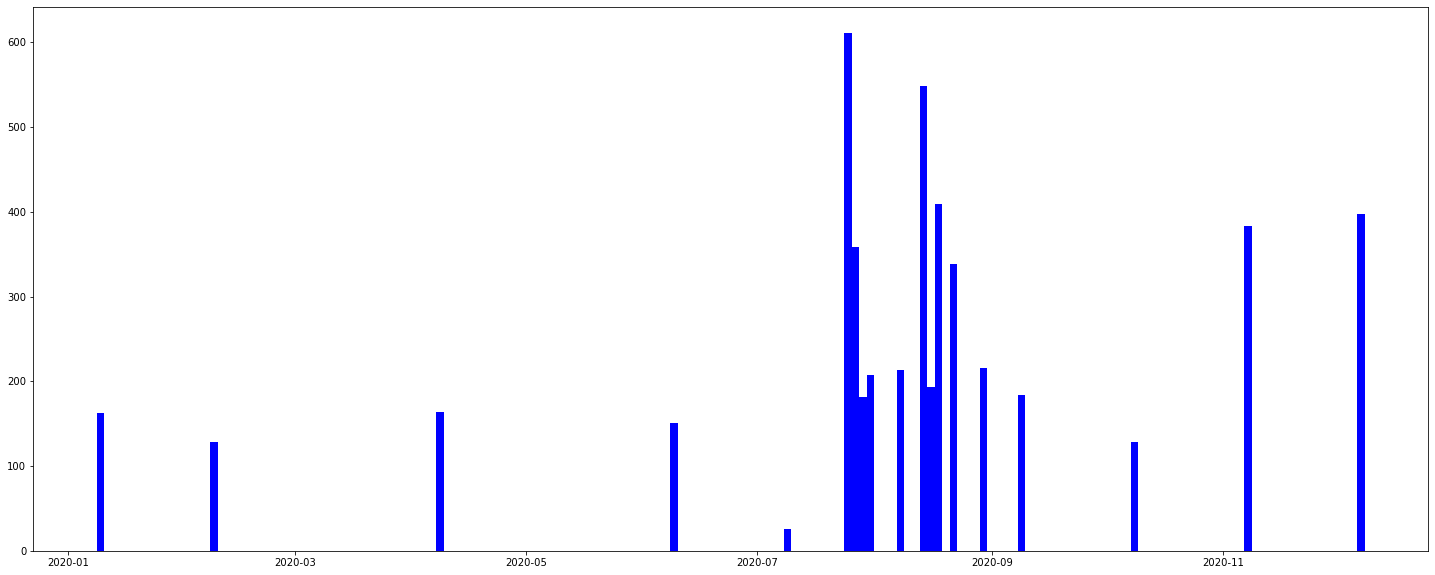

In [12]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
#ax.set(title='Temporal tweet frequency in Bangladesh')
plt.hist(pd.to_datetime(df.date), bins = 24*7, color = 'b')
plt.rc('xtick',  labelsize=18)
plt.rc('ytick',  labelsize=18)      
plt.show()


In [13]:
text_en = df['text']

In [14]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr.head()

0    This is my new brand is about the healthy way ...
1    2020s Latest accessory Could do with this when...
2           grant to one of ten leading to receive for
3         BRAND NEW CHARITY ALERT help them with their
4                               for the scheme COVID19
Name: text, dtype: object

In [15]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()
#lowercase conversion

0    this is my new brand is about the healthy way ...
1    2020s latest accessory could do with this when...
2           grant to one of ten leading to receive for
3         brand new charity alert help them with their
4                               for the scheme covid19
Name: text, dtype: object

In [16]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head()
#remove punctuation

0    this is my new brand is about the healthy way ...
1    2020s latest accessory could do with this when...
2           grant to one of ten leading to receive for
3         brand new charity alert help them with their
4                               for the scheme covid19
Name: text, dtype: object

In [17]:
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus','know','bengal','day','hai','se','de','go','ka','must','ko','hi','taking','indiafightscorona','us','let','modi','take','india','pmoindia','2','19','one','due','get','assam','narendramodi','sir','via','dont','also','namo','and','the','to','off','as','in','for','at','I','a','.','-','_','#indiafightscorona' 'india' ,'#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus','covid19india', 'covid19'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0          new brand healthy way breathing
1    2020s latest accessory could shopping
2                grant ten leading receive
3             brand new charity alert help
4                                   scheme
Name: text, dtype: object

In [18]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:5]

['new', 'brand', 'healthy', 'way', 'breathing']

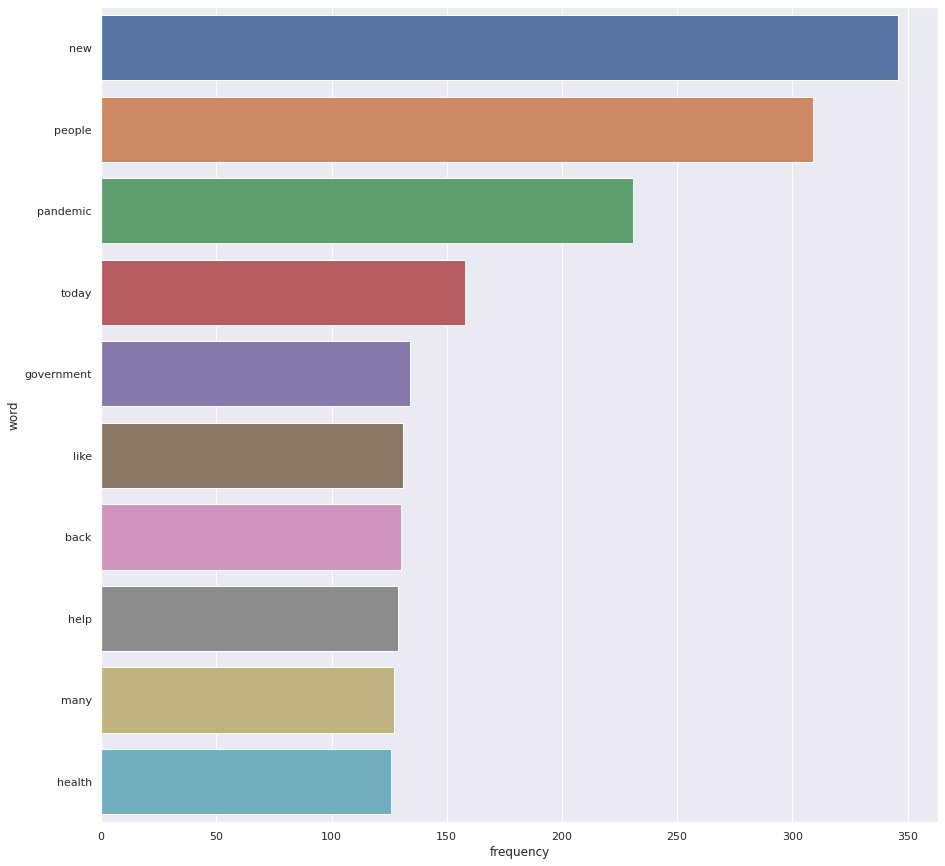

In [19]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(10)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, capsize=30)
plt.savefig('wordcount_bar.png')

In [20]:


# plt.figure(figsize = (12, 10), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

# plt.savefig('wordcloud.png')

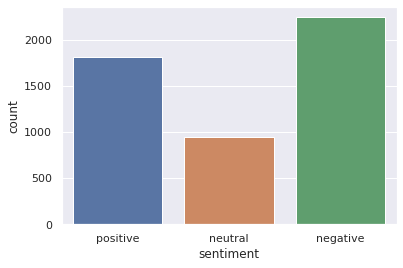

In [21]:
sent_counts = pd.DataFrame.from_dict(Counter(df['sentiment']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts, capsize=19)
plt.savefig('sentiment.png')

In [22]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = text_en_lr_lc_pr_sr
polar_tweets_df['polarity'] = df['sentiment']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

wordcloud = WordCloud(
    background_color='white',
    max_words=30,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


positive_cloud = WordCloud(
    background_color='white',
    max_words=30,
    max_font_size=40, 
    scale=5,
    random_state=23,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='white',
    max_words=30,
    max_font_size=40, 
    scale=5,
    random_state=23,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='white',
    max_words=30,
    max_font_size=40, 
    scale=5,
    random_state=32,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))


# fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# # fig.suptitle('Clouds of polar words', fontsize = 30)
# fig.tight_layout(pad = 0)

# axs[0, 0].imshow(positive_cloud)
# axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
# axs[0, 0].axis('off')
# # axs[0, 0].tight_layout(pad = 1)

# axs[0, 1].imshow(negative_cloud)
# axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
# axs[0, 1].axis('off')
# # axs[0, 1].tight_layout(pad = 1)

# axs[1, 0].imshow(neutral_cloud)
# axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
# axs[1, 0].axis('off')
# # axs[1, 0].tight_layout(pad = 1)

# axs[1, 1].imshow(wordcloud)
# axs[1, 1].set_title('Words from all tweets', fontsize = 20)
# axs[1, 1].axis('off')
# # axs[1, 0].tight_layout(pad = 1)
# plt.savefig('joint_cloud.png')

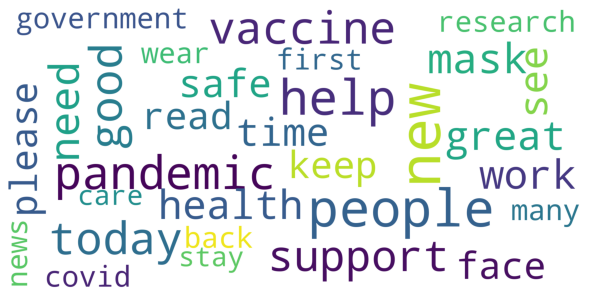

In [23]:
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(positive_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("pos_cloud.png")

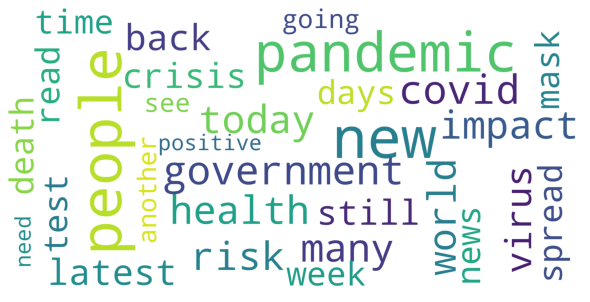

In [24]:
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(negative_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("neg_cloud.png")

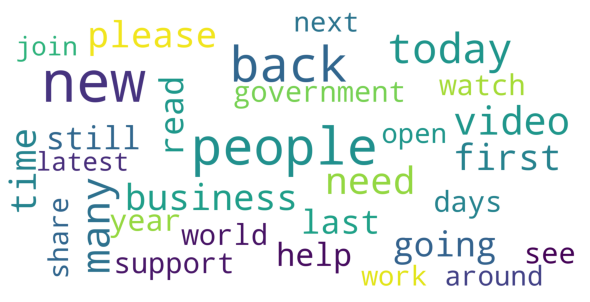

In [25]:
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(neutral_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("neutral_cloud.png")

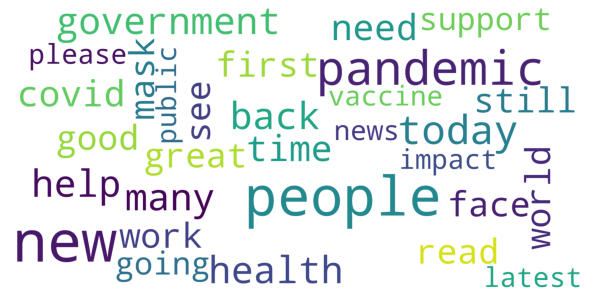

In [26]:
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("all_cloud.png")

In [27]:
df["vaccine"]=0
df["lockdown"]=0
df["wash_hands"]=0
df["lockdown"]=0
df["stay_home"]=0
df["stay_safe"]=0
df["sanitize"]=0
df["quarantine"]=0

In [28]:
df['vaccine'] = df['text'].str.contains('vaccine', case=False).astype(int)
df['lockdown'] = df['text'].str.contains('lockdown', case=False).astype(int)
df['wash_hands'] = df['text'].str.contains('wash_hands', case=False).astype(int)
df['stay_home'] = df['text'].str.contains('stay_home', case=False).astype(int)
df['stay_safe'] = df['text'].str.contains('stay_safe', case=False).astype(int)
df['sanitize'] = df['text'].str.contains('sanitize', case=False).astype(int)
df['quarantine'] = df['text'].str.contains('quarantine', case=False).astype(int)

In [29]:
#del df['category']
df["category"]="None"

In [30]:
#df.loc[df['text'].str.contains('corona', case=False),'category'] = "corona"
#df.loc[df['text'].str.contains('coronavirus', case=False),'category'] = "coronavirus"
#df.loc[df['text'].str.contains('covid', case=False),'category'] = "COVID-19"

df.loc[df['text'].str.contains('vaccine', case=False),'category'] = "vaccine"
df.loc[df['text'].str.contains('medicine', case=False),'category'] = "vaccine"

df.loc[df['text'].str.contains('lockdown', case=False),'category'] = "lockdown"
df.loc[df['text'].str.contains('shutdown', case=False),'category'] = "lockdown"

#df.loc[df['text'].str.contains('wash hands', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('washhands', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('washhand', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('washhand', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('clean', case=False),'category'] = "wash hands"

df.loc[df['text'].str.contains('mask', case=False),'category'] = "mask"
df.loc[df['text'].str.contains('wearmask', case=False),'category'] = "mask"



df.loc[df['text'].str.contains('stay home', case=False),'category'] = "stay home"
df.loc[df['text'].str.contains('stayhome', case=False),'category'] = "stay home"

df.loc[df['text'].str.contains('stay safe', case=False),'category'] = "stay safe"
df.loc[df['text'].str.contains('staysafe', case=False),'category'] = "stay safe"

#df.loc[df['text'].str.contains('sanitize', case=False),'category'] = "sanitize"
#df.loc[df['text'].str.contains('sanitizer', case=False),'category'] = "sanitize"

df.loc[df['text'].str.contains('quarantine', case=False),'category'] = "quarantine"
df.loc[df['text'].str.contains('quarantinetime', case=False),'category'] = "quarantine"
df.loc[df['text'].str.contains('quarantinemood', case=False),'category'] = "quarantine"



df.loc[df['text'].str.contains('epidemic', case=False),'category'] = "epidemic"
df.loc[df['text'].str.contains('pandemic', case=False),'category'] = "epidemic"
df.loc[df['text'].str.contains('outbreak', case=False),'category'] = "outbreak"

#df.loc[df['text'].str.contains('government', case=False),'category'] = "government"
#df.loc[df['text'].str.contains('govt', case=False),'category'] = "government"

df.loc[df['text'].str.contains('hospital', case=False),'category'] = "hospital"
df.loc[df['text'].str.contains('help', case=False),'category'] = "hospital"
df.loc[df['text'].str.contains('hospitals', case=False),'category'] = "hospital"



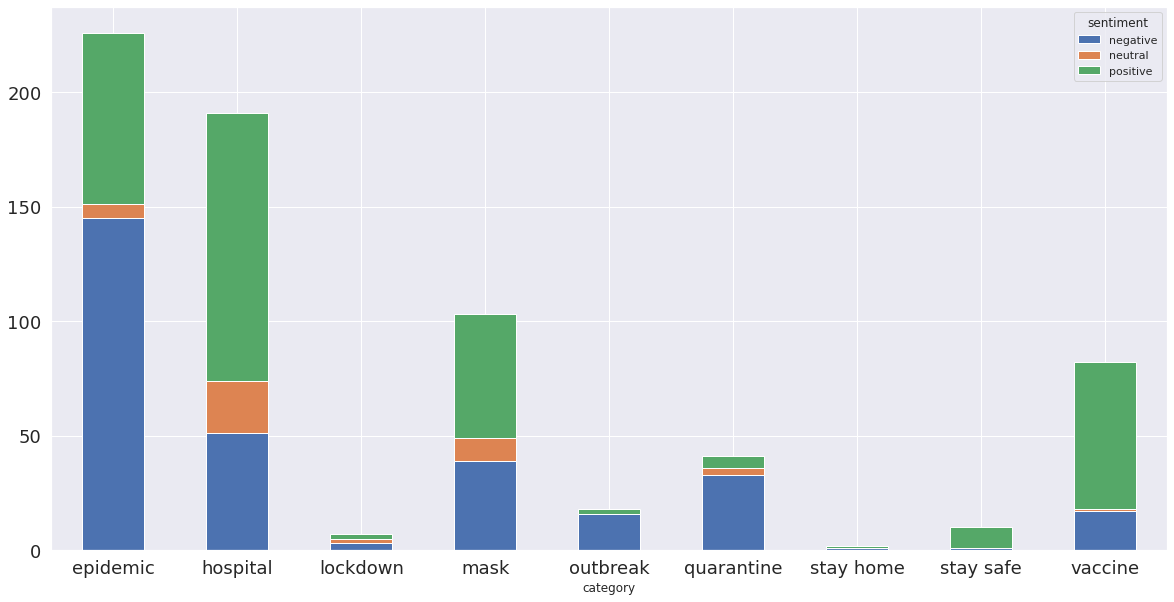

In [31]:
pd.crosstab(index = df["category"],columns = df["sentiment"]).drop(['None']).plot(kind='bar',figsize=(20, 10),alpha=1,rot=0, fontsize=18,stacked=True)
plt.savefig("category.png")

In [32]:
#pd.crosstab(index = df["date"],columns = df["sentiment"]).plot(kind='bar',figsize=(15, 10),alpha=0.5,rot=0,stacked=True,title="COVID-19 Sentiment")

In [33]:
df.date = pd.to_datetime(df.date)
df.date=df.date.astype(str)

In [34]:
df["month"]=0
# df.loc[df['date'].str.contains('2020-05-',regex=True, case=False),'month'] = "M-5(May)"
# df.loc[df['date'].str.contains('2020-04-',regex=True, case=False),'month'] = "M-4(April)"
# df.loc[df['date'].str.contains('2020-03-',regex=True, case=False),'month'] = "M-3(March)"
# df.loc[df['date'].str.contains('2020-02-',regex=True, case=False),'month'] = "M-2(February)"
# df.loc[df['date'].str.contains('2020-01-',regex=True, case=False),'month'] = "M-1(January)"

df.loc[df['date'].str.contains('2020-12-',regex=True, case=False),'month'] = "December"
df.loc[df['date'].str.contains('2020-11-',regex=True, case=False),'month'] = "November"
df.loc[df['date'].str.contains('2020-10-',regex=True, case=False),'month'] = "October"
df.loc[df['date'].str.contains('2020-09-',regex=True, case=False),'month'] = "September"
df.loc[df['date'].str.contains('2020-08-',regex=True, case=False),'month'] = "August"
df.loc[df['date'].str.contains('2020-07-',regex=True, case=False),'month'] = "July"
df.loc[df['date'].str.contains('2020-06-',regex=True, case=False),'month'] = "June"
df.loc[df['date'].str.contains('2020-05-',regex=True, case=False),'month'] = "May"
df.loc[df['date'].str.contains('2020-04-',regex=True, case=False),'month'] = "April"
df.loc[df['date'].str.contains('2020-03-',regex=True, case=False),'month'] = "March"
df.loc[df['date'].str.contains('2020-02-',regex=True, case=False),'month'] = "February"
df.loc[df['date'].str.contains('2020-01-',regex=True, case=False),'month'] = "January"


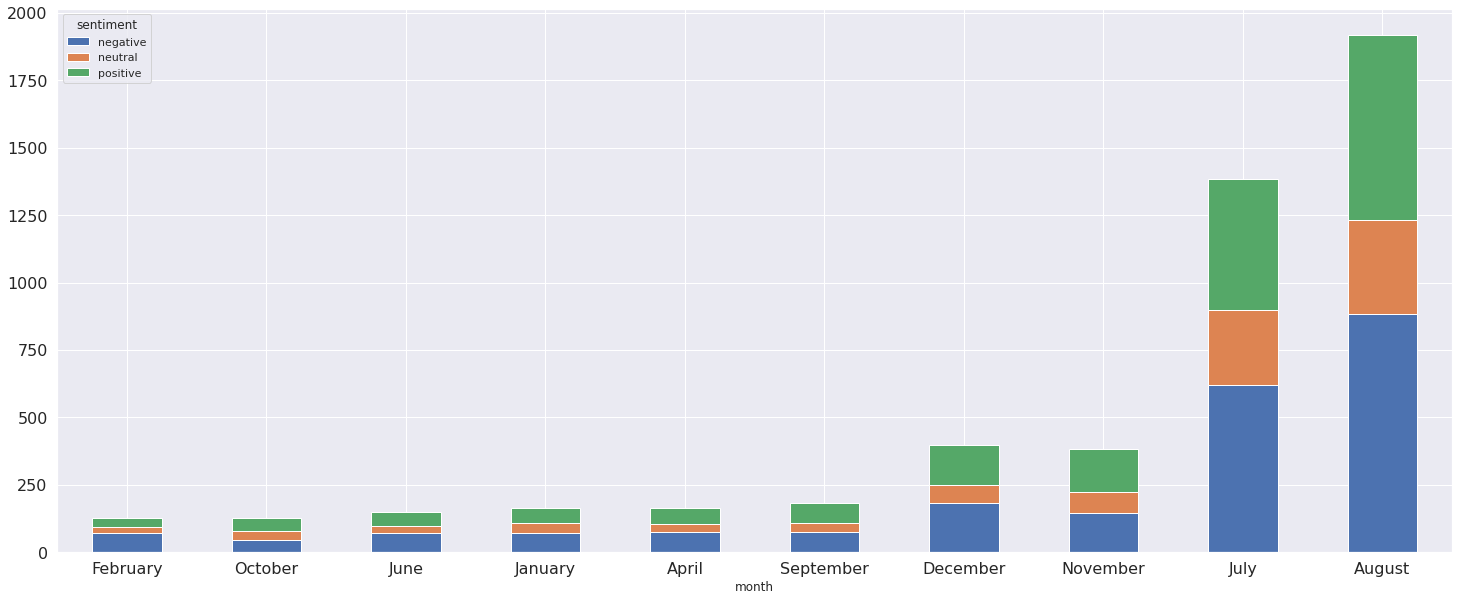

In [35]:
df.sort_values(by=['date'])
bar2=pd.crosstab(index = df["month"],columns = df["sentiment"])
bar2.sort_values(by=['positive'], inplace=True)
bar2.plot(kind='bar',figsize=(25, 10),fontsize=16,alpha=1,rot=0,stacked=True)

In [36]:
plt.savefig("month_comparison.png")

<Figure size 432x288 with 0 Axes>

In [37]:
#ct=pd.crosstab(index = df["category"],columns = df["sentiment"])
#ct.drop(['None'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ser         5000 non-null   int64 
 1   date        5000 non-null   object
 2   text        5000 non-null   object
 3   sentiment   5000 non-null   object
 4   tweet       5000 non-null   object
 5   vaccine     5000 non-null   int64 
 6   lockdown    5000 non-null   int64 
 7   wash_hands  5000 non-null   int64 
 8   stay_home   5000 non-null   int64 
 9   stay_safe   5000 non-null   int64 
 10  sanitize    5000 non-null   int64 
 11  quarantine  5000 non-null   int64 
 12  category    5000 non-null   object
 13  month       5000 non-null   object
dtypes: int64(8), object(6)
memory usage: 547.0+ KB


In [39]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [40]:
df['date']

0       2020-01-08
1       2020-10-08
2       2020-08-18
3       2020-01-08
4       2020-08-13
           ...    
4995    2020-08-22
4996    2020-08-14
4997    2020-07-26
4998    2020-08-29
4999    2020-08-13
Name: date, Length: 5000, dtype: object

In [41]:
ct=pd.crosstab(index = df["date"],columns = df["sentiment"])
ct

sentiment,negative,neutral,positive
date,,,
2020-01-08,71,37,55
2020-02-08,72,20,36
2020-04-08,77,27,60
2020-06-08,73,24,54
2020-07-08,11,5,10
2020-07-24,1,1,2
2020-07-25,265,114,228
2020-07-26,119,51,68
2020-07-27,59,23,38


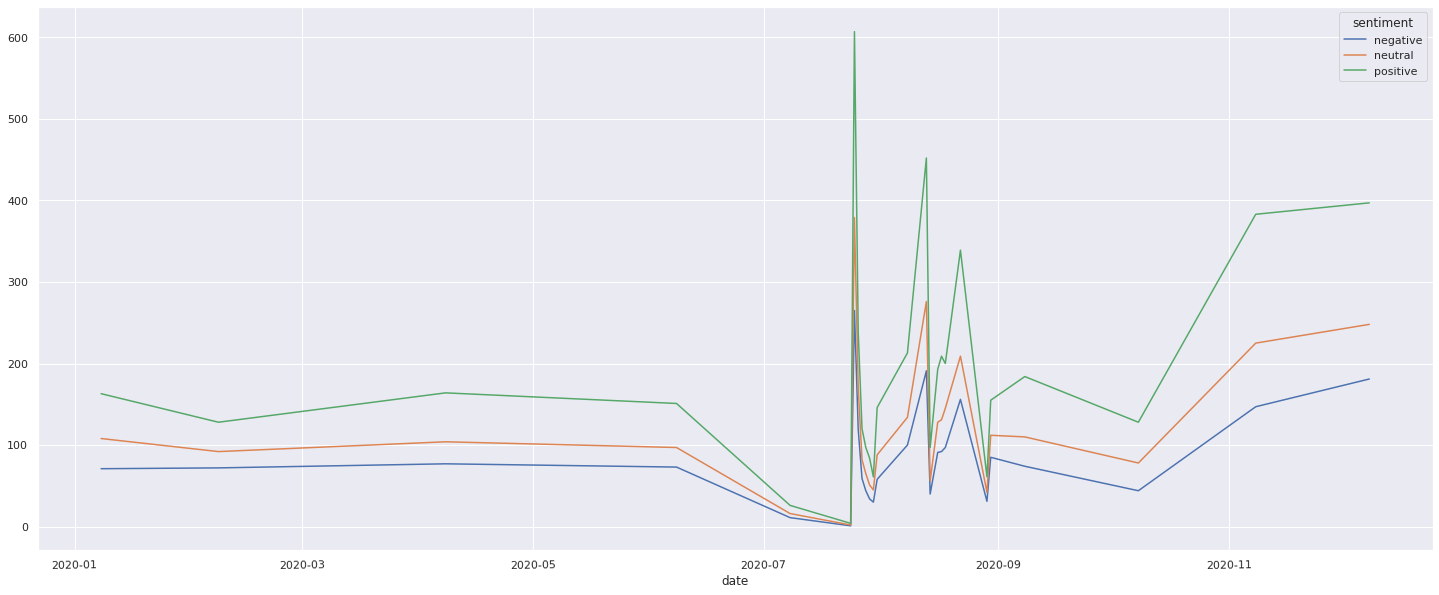

In [42]:
ct.plot(kind='line',figsize=(25, 10),alpha=1,rot=1,stacked=True)

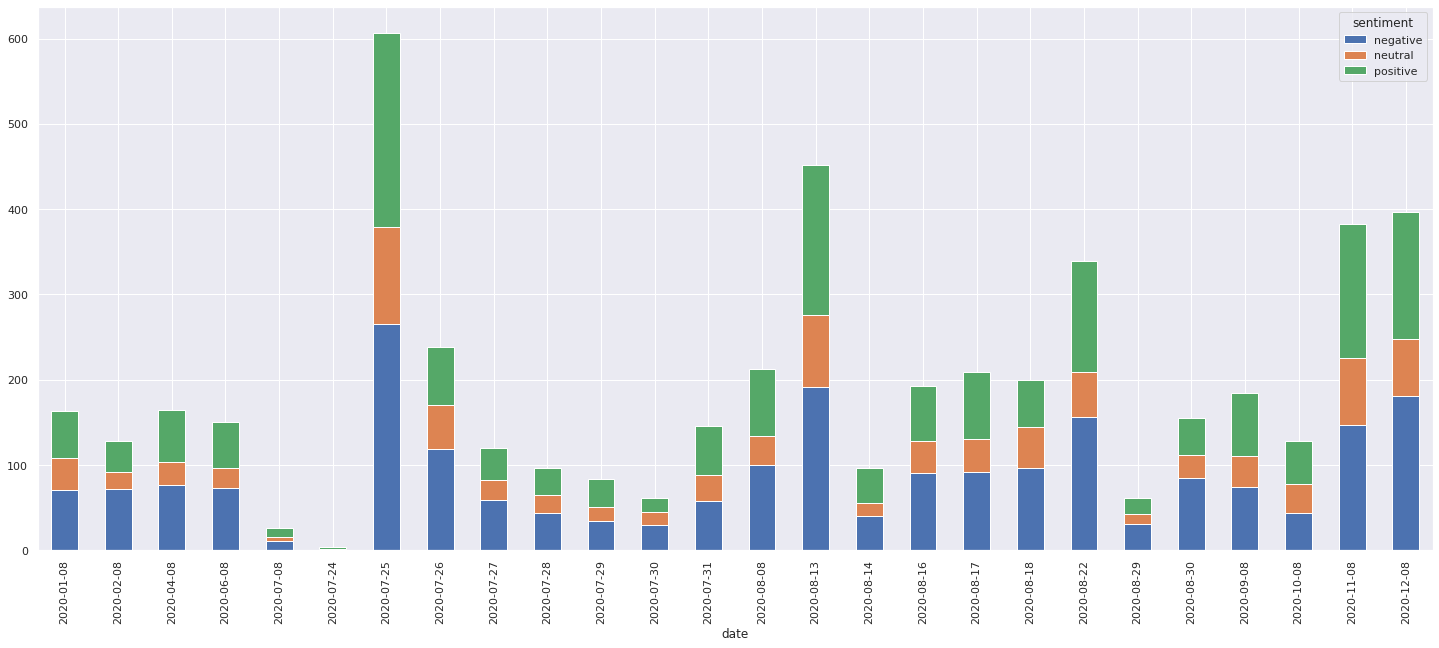

In [43]:
ct.plot(kind='bar',figsize=(25, 10),alpha=1, stacked=True)


In [44]:
plt.savefig("daywise_comparison.png")

<Figure size 432x288 with 0 Axes>

In [45]:
# sentiments_time_df = pd.DataFrame()
# sentiments_time_df['time'] = df['date']
# sentiments_time_df['polarity'] = df['pos_p']
# sentiments_time_df.index = pd.to_datetime(sentiments_time_df['time'])


# ot = sentiments_time_df.sample(frac=.001)
# ot['time'] = pd.to_datetime(ot['time'])
# ot.index = pd.to_datetime(ot['time'])
# ot.sort_index(inplace=True)
# ot['expanding'] = ot['polarity'].expanding().mean()
# ot['rolling'] = ot['polarity'].rolling('1h').mean()

# fig = plt.figure(figsize=(20,5))
# ax = fig.add_subplot(111)
# ax.scatter(ot['time'],ot['polarity'], label='Tweet Sentiment', s = 10, color = 'y')
# ax.plot(ot['time'],ot['rolling'], color ='r', label='Rolling Mean', linewidth = 5)
# ax.plot(ot['time'],ot['expanding'], color='b', label='Expanding Mean', linewidth = 5)
# ax.set_xlim([dt.date(2020,5,1),dt.date(2020,5,9)])
# ax.set(title='Tweet Sentiments over Time', xlabel='Date', ylabel='Sentiment polarity')
# ax.legend(loc='best')
# fig.tight_layout()
# plt.savefig('temporal_sentiments.png')

In [46]:
ct['positive%']=(ct['positive']/(ct['positive']+ct['negative']+ct['neutral']))*100
ct['negative%']=(ct['negative']/(ct['positive']+ct['negative']+ct['neutral']))*100
ct['neutral%']=(ct['neutral']/(ct['positive']+ct['negative']+ct['neutral']))*100

In [47]:
ct

sentiment,negative,neutral,positive,positive%,negative%,neutral%
date,,,,,,
2020-01-08,71,37,55,33.742331,43.558282,22.699387
2020-02-08,72,20,36,28.125000,56.250000,15.625000
2020-04-08,77,27,60,36.585366,46.951220,16.463415
2020-06-08,73,24,54,35.761589,48.344371,15.894040
2020-07-08,11,5,10,38.461538,42.307692,19.230769
2020-07-24,1,1,2,50.000000,25.000000,25.000000
2020-07-25,265,114,228,37.561779,43.657331,18.780890
2020-07-26,119,51,68,28.571429,50.000000,21.428571
2020-07-27,59,23,38,31.666667,49.166667,19.166667


In [48]:
dt=ct
dt

sentiment,negative,neutral,positive,positive%,negative%,neutral%
date,,,,,,
2020-01-08,71,37,55,33.742331,43.558282,22.699387
2020-02-08,72,20,36,28.125000,56.250000,15.625000
2020-04-08,77,27,60,36.585366,46.951220,16.463415
2020-06-08,73,24,54,35.761589,48.344371,15.894040
2020-07-08,11,5,10,38.461538,42.307692,19.230769
2020-07-24,1,1,2,50.000000,25.000000,25.000000
2020-07-25,265,114,228,37.561779,43.657331,18.780890
2020-07-26,119,51,68,28.571429,50.000000,21.428571
2020-07-27,59,23,38,31.666667,49.166667,19.166667


In [49]:
#dt=dt.drop(columns=['positive','negative','neutral'])
#dt=dt.drop(columns=['positive','negative','neutral','pos_percentage','neg_percentage','neutral_percentage'])
dt=dt.drop(columns=['positive','negative','neutral'])

In [50]:
dt.to_csv('demo.csv')

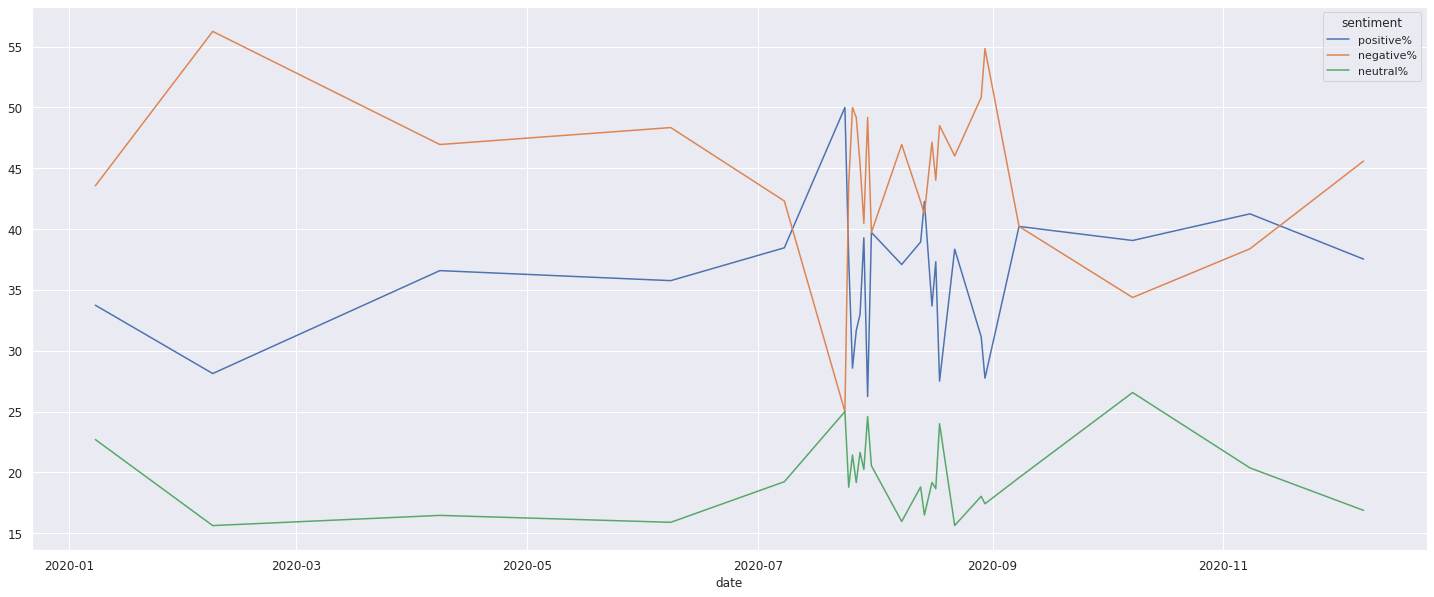

In [51]:
dt.plot(kind='line',figsize=(25, 10),alpha=1,fontsize=12,stacked=False)

In [52]:
plt.savefig("dayswise_percentage.png")

<Figure size 432x288 with 0 Axes>